# ASL recognition using Convolutional Neural Networks

## Importing tensorflow

In [2]:
import numpy as np
import tensorflow as tf
import os

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train_dir = "/content/gdrive/My Drive/dataset/asl_alphabet_train/asl_alphabet_train/"

In [5]:
 # This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
BATCH_SIZE = 100
IMG_SHAPE  = 50

In [7]:
#image agumentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen_train = ImageDataGenerator(
      rescale=1./255,#rescaling
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      featurewise_center =True,#standardization
      featurewise_std_normalization = True)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     color_mode = 'rgb',# color 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')


Found 69243 images belonging to 29 classes.


In [8]:
train_data_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


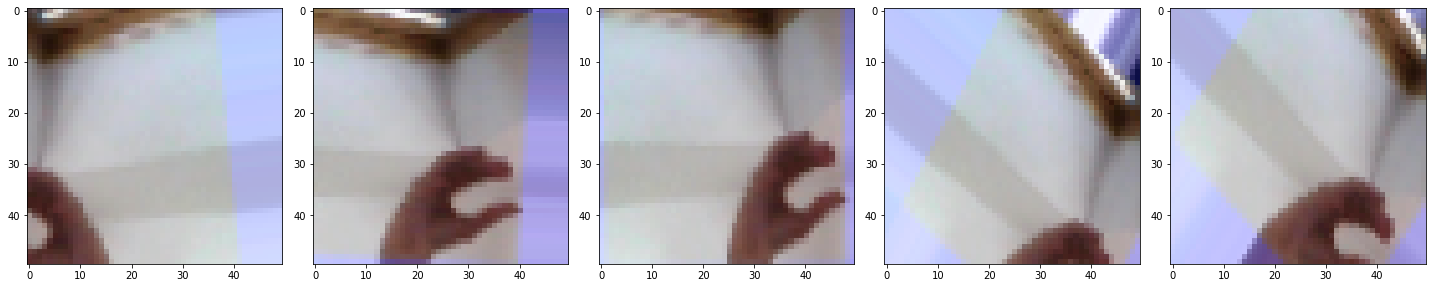

In [9]:
import matplotlib.pyplot as plt
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
batch_size=32
img_height=64
img_width=64

In [11]:
#spliting the train into train
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 69243 files belonging to 29 classes.
Using 62319 files for training.


In [ ]:
#spliting the data to validate
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.09,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
#spliting the data to test
test_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.01,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Creating the Model

## Method #1: traditional CNN with 15 layers

In [ ]:
from keras import Sequential
from keras import layers

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=validation_ds,epochs=10)

2022-12-03 02:46:06.672381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 02:46:06.673001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 02:46:06.673326: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 02:46:06.673717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 02:46:06.674036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/10


2022-12-03 02:46:08.217459: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2447/2447 [==============================] - 216s 85ms/step - loss: 0.7898 - accuracy: 0.7527 - val_loss: 0.1040 - val_accuracy: 0.9664
Epoch 2/10
2447/2447 [==============================] - 57s 23ms/step - loss: 0.1333 - accuracy: 0.9541 - val_loss: 0.0240 - val_accuracy: 0.9935
Epoch 3/10
2447/2447 [==============================] - 58s 23ms/step - loss: 0.0811 - accuracy: 0.9724 - val_loss: 0.0176 - val_accuracy: 0.9953
Epoch 4/10
2447/2447 [==============================] - 57s 23ms/step - loss: 0.0639 - accuracy: 0.9784 - val_loss: 0.0140 - val_accuracy: 0.9957
Epoch 5/10
2447/2447 [==============================] - 57s 23ms/step - loss: 0.0519 - accuracy: 0.9825 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 6/10
2447/2447 [==============================] - 57s 23ms/step - loss: 0.0477 - accuracy: 0.9840 - val_loss: 0.0180 - val_accuracy: 0.9928
Epoch 7/10
2447/2447 [==============================] - 57s 23ms/step - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0301 - val_accur

### Plotting accuracy and loss with each epoch

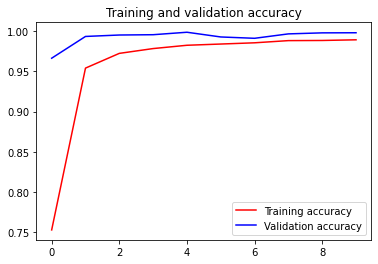

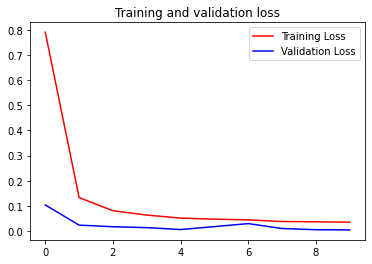

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



### Saving the model

In [ ]:
model.save('model1.h5')

### Testing on test dataset

In [ ]:
actual = []
pred = []
for images, labels in test_ds:
    for i in range(0, len(images)):
        image = images[i]
        image = np.expand_dims(image, axis=0)
        result = model.predict(image)
        pred.append(class_names[np.argmax(result)])
        actual.append(class_names[labels[i].numpy()])

In [ ]:
print("actual \t  predicted")
for i in range(0,10):
    print(actual[i],"\t",pred[i])

actual 	  predicted
N 	 Y
N 	 M
N 	 M
N 	 M
N 	 N
N 	 M
N 	 N
N 	 N
N 	 N
N 	 M


## Method #2: Transfer learning

In [ ]:
transfer_model = Sequential([
    tf.keras.applications.MobileNet(
        input_shape=(img_height, img_width, 3),
    alpha=1.0,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu',
                bias_regularizer='l2',
                activity_regularizer='l2'
                ),
    layers.Dense(len(class_names),activation='softmax',
                bias_regularizer='l2',
                activity_regularizer='l2'
                )
])

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
transfer_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = transfer_model.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=validation_ds,epochs=10)

2022-12-03 03:15:11.142053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 03:15:11.142579: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 03:15:11.142961: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 03:15:11.143335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 03:15:11.143674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/10
2447/2447 [==============================] - 73s 29ms/step - loss: 0.9968 - accuracy: 0.8094 - val_loss: 0.3256 - val_accuracy: 0.9536
Epoch 2/10
2447/2447 [==============================] - 78s 32ms/step - loss: 0.4892 - accuracy: 0.9086 - val_loss: 0.3220 - val_accuracy: 0.9464
Epoch 3/10
2447/2447 [==============================] - 70s 29ms/step - loss: 0.3250 - accuracy: 0.9440 - val_loss: 0.5086 - val_accuracy: 0.8954
Epoch 4/10
2447/2447 [==============================] - 69s 28ms/step - loss: 0.3727 - accuracy: 0.9270 - val_loss: 0.4133 - val_accuracy: 0.8971
Epoch 5/10
2447/2447 [==============================] - 69s 28ms/step - loss: 0.3286 - accuracy: 0.9323 - val_loss: 0.2403 - val_accuracy: 0.9637
Epoch 6/10
2447/2447 [==============================] - 71s 29ms/step - loss: 0.2696 - accuracy: 0.9550 - val_loss: 0.3191 - val_accuracy: 0.9299
Epoch 7/10
2447/2447 [==============================] - 69s 28ms/step - loss: 0.2391 - accuracy: 0.9499 - val_loss: 1.5315 -

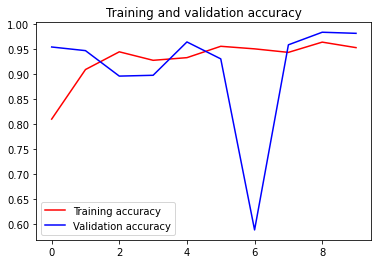

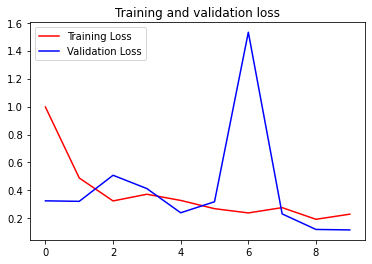

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [ ]:
transfer_model.save('model2.h5')

In [ ]:
actual = []
pred = []
for images, labels in test_ds:
    for i in range(0, len(images)):
        image = images[i]
        image = np.expand_dims(image, axis=0)
        result = transfer_model.predict(image)
        pred.append(class_names[np.argmax(result)])
        actual.append(class_names[labels[i].numpy()])

In [ ]:
print("actual \t  predicted")
for i in range(0,10):
    print(actual[i],"\t",pred[i])

actual 	  predicted
Q 	 Q
nothing 	 nothing
Q 	 Q
V 	 V
F 	 F
P 	 P
A 	 A
J 	 J
R 	 R
V 	 V
